In [1]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Flatten,Dropout,MaxPooling2D 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

import os 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs.zip' 
path_to_zip = tf.keras.utils.get_file('/content/drive/MyDrive/Deep_Learning/CNN/cats_and_dogs.zip', origin=_URL, extract=True) 
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs.zip') 

Exception: ignored

In [ ]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs.zip') 
New_PATH="/content/drive/MyDrive/Deep_Learning/CNN/cats_and_dogs" 

#!unzip $PATH -d $New_PATH 

In [2]:
datapath = "/content/drive/MyDrive/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered"
datapath

'/content/drive/MyDrive/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered'

In [3]:
! ls $datapath

train  validation  vectorize.py


In [4]:
train_dir = os.path.join(datapath,'train') 
validation_dir = os.path.join(datapath,'validation') 

In [5]:
train_cats_dir = os.path.join(train_dir,'cats') # Directory with our training cat pics 
train_dogs_dir = os.path.join(train_dir,'dogs') # Directory with our training dogs pics 
validation_cats_dir = os.path.join(validation_dir,'cats') # Directory with our validation cats pics 
validation_dogs_dir = os.path.join(validation_dir,'dogs') # Directory with our validation dogs pics 

In [6]:
num_cat_tr = len(os.listdir(train_cats_dir))
num_dog_tr = len(os.listdir(train_dogs_dir))
num_cat_val = len(os.listdir(validation_cats_dir))
num_dog_val = len(os.listdir(validation_dogs_dir))

total_train = num_cat_tr + num_dog_tr 
total_val = num_cat_val + num_dog_val 

In [7]:
print(f"Total trainning cat images  : {num_cat_tr}")
print(f"Total trainning dog images  : {num_dog_tr}")
print(f"Total validation cat images : {num_cat_val}")
print(f"Total validation dog images : {num_dog_val}")
print("----------------------------------------------") 
print(f"Total training images   : {total_train}") 
print(f"Total validation images : {total_val}") 



Total trainning cat images  : 1000
Total trainning dog images  : 1000
Total validation cat images : 500
Total validation dog images : 500
----------------------------------------------
Total training images   : 2000
Total validation images : 1000


In [8]:
batch_size = 128  # Power of 2 ---> 64, 128, 256, 512
epochs = 30 
IMG_HEIGHT = 150 
IMG_WIDTH = 150

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255) # generator for our training data           (# Scale Down--> MinMaxScaling)
validation_image_generator = ImageDataGenerator(rescale=1./255) # generator for our validation data 

In [10]:
train_data_gen= train_image_generator.flow_from_directory( batch_size=batch_size, 
                                                     directory = train_dir, shuffle = True, 
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH), 
                                                     class_mode='binary') # Multiclass ---> class_mode ="caterogry" 

Found 2000 images belonging to 2 classes.


In [11]:
validation_data_gen = validation_image_generator.flow_from_directory( batch_size=batch_size, 
                                                         directory = validation_dir, 
                                                         shuffle = True, target_size=(IMG_HEIGHT,IMG_WIDTH), 
                                                         class_mode='binary') # Multiclass ---> class_mode ="caterogry" 

Found 1000 images belonging to 2 classes.


In [12]:
sample_trainning_images,_ = next(train_data_gen)

In [13]:
sample_training_images, check = next(train_data_gen)

In [14]:
check

array([1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1.], dtype=float32)

In [17]:
len(sample_trainning_images)

128

In [18]:
sample_training_images[0]

array([[[0.44705886, 0.43921572, 0.45098042],
        [0.427451  , 0.41960788, 0.43137258],
        [0.4156863 , 0.40784317, 0.41176474],
        ...,
        [0.6       , 0.58431375, 0.54901963],
        [0.5803922 , 0.5647059 , 0.5294118 ],
        [0.5882353 , 0.56078434, 0.5294118 ]],

       [[0.5254902 , 0.5176471 , 0.5294118 ],
        [0.5176471 , 0.50980395, 0.5137255 ],
        [0.50980395, 0.5058824 , 0.49803925],
        ...,
        [0.6156863 , 0.6       , 0.5647059 ],
        [0.6       , 0.58431375, 0.54901963],
        [0.5921569 , 0.5647059 , 0.53333336]],

       [[0.5254902 , 0.5176471 , 0.52156866],
        [0.5019608 , 0.49411768, 0.49803925],
        [0.48627454, 0.48235297, 0.47450984],
        ...,
        [0.5882353 , 0.57254905, 0.5372549 ],
        [0.6       , 0.58431375, 0.54901963],
        [0.6039216 , 0.5764706 , 0.54509807]],

       ...,

       [[0.48235297, 0.454902  , 0.4156863 ],
        [0.34117648, 0.3137255 , 0.27450982],
        [0.45882356, 0

In [19]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column. 
def plotImages(images_arr): 
  fig, axes = plt.subplots(1, 5, figsize=(20,20)) 
  axes = axes.flatten() 
  for img, ax in zip( images_arr, axes):
    ax.imshow(img) 
    ax.axis('off')
  plt.tight_layout()
  plt.show() 

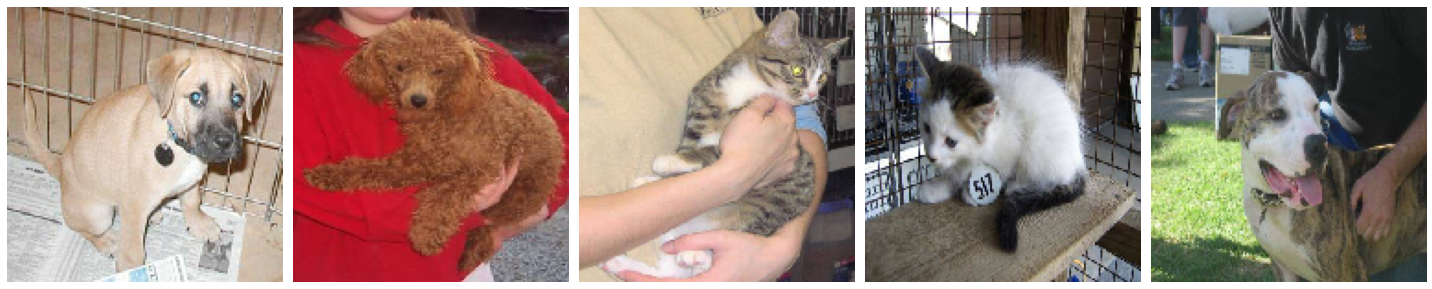

In [20]:
plotImages(sample_training_images[3:8])

In [21]:
# Let trains
model = Sequential([Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
                           MaxPooling2D(), 
                           Conv2D(32,3,padding='same',activation='relu'), 
                           MaxPooling2D(), 
                           Conv2D(64,3,padding='same',activation='relu'), 
                           MaxPooling2D(), 
                           Flatten(), 
                           Dense(512,activation='relu'), 
                           Dense(1,activation='sigmoid')
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy']) 

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [ ]:
# Model fit 
history = model.fit( train_data_gen, 
                    steps_per_epoch=total_train//batch_size, 
                    epochs=10, 
                    validation_data=validation_data_gen, validation_steps=total_val//batch_size ) 

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 519s 35s/step - loss: 0.8884 - accuracy: 0.5048 - val_loss: 0.6881 - val_accuracy: 0.5167
Epoch 2/10
15/15 [==============================] - 11s 764ms/step - loss: 0.6758 - accuracy: 0.5908 - val_loss: 0.6550 - val_accuracy: 0.6127
Epoch 3/10
15/15 [==============================] - 11s 754ms/step - loss: 0.6447 - accuracy: 0.6464 - val_loss: 0.6525 - val_accuracy: 0.6183
Epoch 4/10
15/15 [==============================] - 11s 772ms/step - loss: 0.5972 - accuracy: 0.6864 - val_loss: 0.6032 - val_accuracy: 0.6730
Epoch 5/10
15/15 [==============================] - 11s 762ms/step - loss: 0.5511 - accuracy: 0.7260 - val_loss: 0.5969 - val_accuracy: 0.6964
Epoch 6/10
15/15 [==============================] - 11s 745ms/step - loss: 0.4867 - accuracy: 0.7719 - val_loss: 0.6031 - val_accuracy: 0.6797
Epoch 7/10
15/15 [==============================] - 11s 766ms/step - loss: 0.4547 - accuracy: 0.7837 - val_loss: 0.6755 - val_accuracy: 0.6786
Epoch 8/10


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

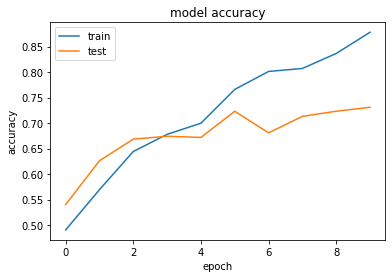

In [ ]:
# summarize history for accuracy 
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show() 

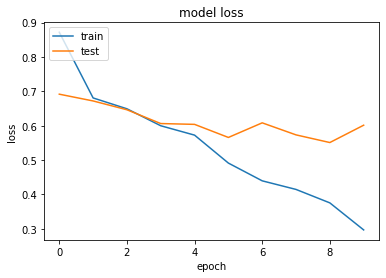

In [ ]:
# summarize history for loss 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show() 

In [ ]:
import math 
def sigmoid(x):
  return 1/ (1+ math.exp(-x)) 


# Predict with new data
img_size = (150,150)
from PIL import Image
import numpy as np 
im = Image.open("/content/drive/MyDrive/Deep_Learning/CNN/test/Cats.jpg") 
im = im.resize(img_size) 
im = np.expand_dims(im,axis=0) 
im = np.array(im) 
im = im/255 
pred = model.predict([im])
if pred > 0.5:                   
  prediction='dog'
  print("Dog")
else:
  prediction='cat'
  print("Cat")


Dog


In [ ]:
pred

array([[0.80276495]], dtype=float32)

In [ ]:
#Saving model

model.save('/content/drive/MyDrive/Deep_Learning/CNN/DogVsCats_Pred.h5')

In [ ]:
from keras.models import load_model
model_h5 = load_model1("/content/drive/MyDrive/Deep_Learning/CNN/DogVsCats_Pred.h5")

In [ ]:
im = Image.open("/content/drive/MyDrive/Deep_Learning/CNN/test/Cats.jpg") 
im = im.resize(img_size) 
im = np.expand_dims(im,axis=0) 
im = np.array(im) 
im = im/255 
pred = model_h5.predict([im])
if pred > 0.5:                   
  prediction='dog'
  print("Dog")
else:
  prediction='cat'
  print("Cat")


In [ ]:
# Data Augmentation

In [ ]:
# Horizontal flip

train_images_horizontal = ImageDataGenerator(rescale=1./255,horizontal_flip=True) 
train_images_horizontal_gen= train_images_horizontal.flow_from_directory( batch_size=batch_size, 
                                                                         directory = train_dir, shuffle = True, 
                                                                         target_size=(IMG_HEIGHT,IMG_WIDTH), 
                                                                         class_mode='binary')  # Multiclass ---> class_mode ="categorical" 

Found 2000 images belonging to 2 classes.


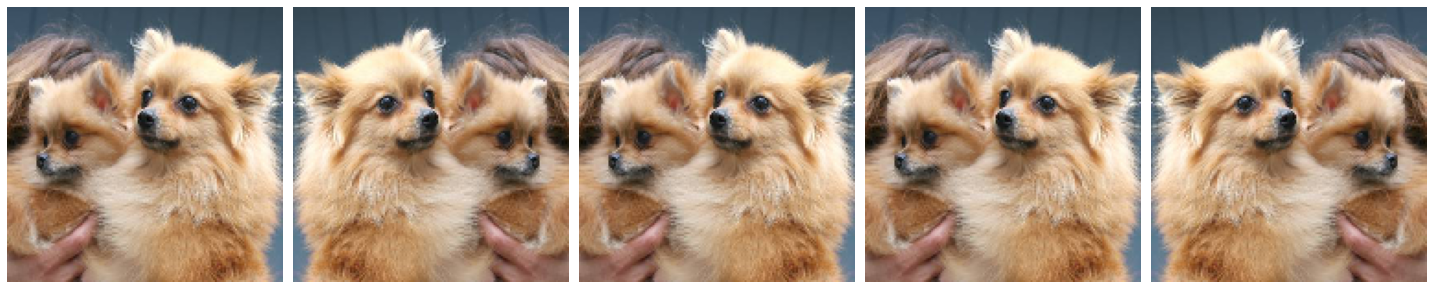

In [ ]:
augmented_images = [train_images_horizontal_gen[0][0][0] for i in range(10)] 
plotImages(augmented_images) 

Found 2000 images belonging to 2 classes.


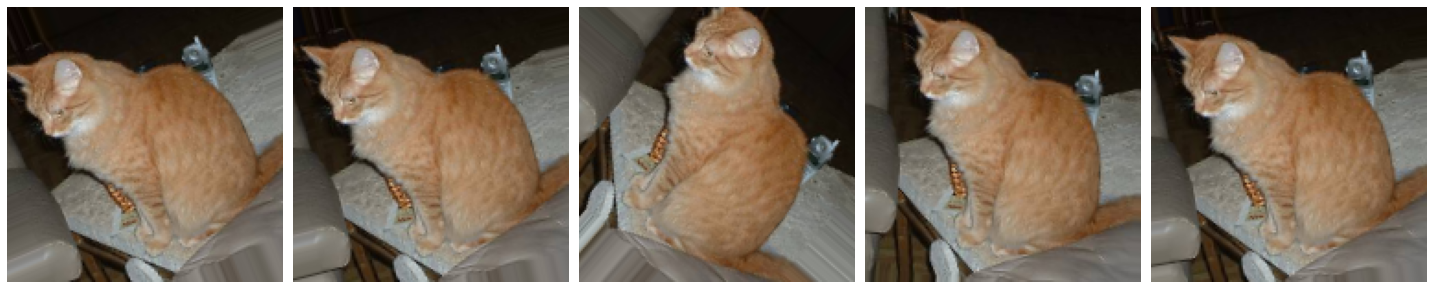

In [ ]:
# Rotation
train_images_rotational = ImageDataGenerator(rescale=1./255,rotation_range=45) 
train_images_rotational_gen= train_images_rotational.flow_from_directory( batch_size=batch_size, 
                                                                         directory = train_dir, shuffle = True, 
                                                                         target_size=(IMG_HEIGHT,IMG_WIDTH), 
                                                                         class_mode='binary')  # Multiclass ---> class_mode ="categorical" 

augmented_images = [train_images_rotational_gen[0][0][0] for i in range(10)] 
plotImages(augmented_images) 

Found 2000 images belonging to 2 classes.


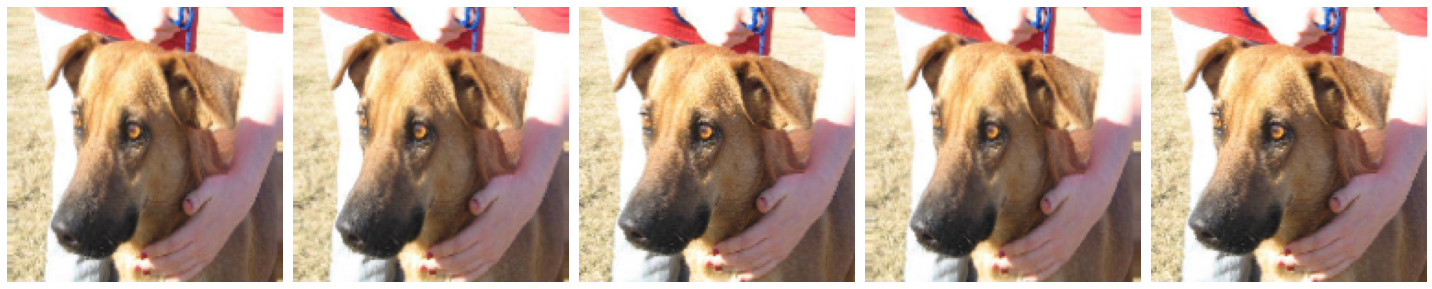

In [ ]:
# Zoom
train_images_zoom = ImageDataGenerator(rescale=1./255,zoom_range=0.05) 
train_images_zoom_gen= train_images_zoom.flow_from_directory( batch_size=batch_size, 
                                                                         directory = train_dir, shuffle = True, 
                                                                         target_size=(IMG_HEIGHT,IMG_WIDTH), 
                                                                         class_mode='binary')  # Multiclass ---> class_mode ="categorical" 

augmented_images = [train_images_zoom_gen[0][0][0] for i in range(10)] 
plotImages(augmented_images) 